In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
p7wine= pd.read_csv("WineQT.csv")

In [340]:
p7wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [341]:
p7wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [342]:
p7wine.rename(columns={
    "fixed acidity": "sabit_asitlik",
    "volatile acidity": "uÃ§ucu_asitlik",
    "citric acid": "sitrik_asit",
    "residual sugar": "artÄ±k_ÅŸeker",
    "chlorides": "klorÃ¼r",
    "free sulfur dioxide": "serbest_sÃ¼lfit",
    "total sulfur dioxide": "toplam_sÃ¼lfit",
    "density": "yoÄŸunluk",
    "pH": "ph",
    "sulphates": "sÃ¼lfat",
    "alcohol": "alkol",
    "quality": "kalite",
    "Id": "id"
}, inplace=True)

In [343]:
p7wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sabit_asitlik   1143 non-null   float64
 1   uÃ§ucu_asitlik   1143 non-null   float64
 2   sitrik_asit     1143 non-null   float64
 3   artÄ±k_ÅŸeker     1143 non-null   float64
 4   klorÃ¼r          1143 non-null   float64
 5   serbest_sÃ¼lfit  1143 non-null   float64
 6   toplam_sÃ¼lfit   1143 non-null   float64
 7   yoÄŸunluk        1143 non-null   float64
 8   ph              1143 non-null   float64
 9   sÃ¼lfat          1143 non-null   float64
 10  alkol           1143 non-null   float64
 11  kalite          1143 non-null   int64  
 12  id              1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [344]:
p7wine.isnull().sum()

sabit_asitlik     0
uÃ§ucu_asitlik     0
sitrik_asit       0
artÄ±k_ÅŸeker       0
klorÃ¼r            0
serbest_sÃ¼lfit    0
toplam_sÃ¼lfit     0
yoÄŸunluk          0
ph                0
sÃ¼lfat            0
alkol             0
kalite            0
id                0
dtype: int64

In [345]:
p7wine.duplicated().sum()

np.int64(0)

In [346]:
p7wine.drop("id", axis=1, inplace=True)

id sÃ¼tununu sildik

In [347]:
p7wine.duplicated().sum()

np.int64(125)

In [348]:
p7wine.drop_duplicates(inplace=True)

Yinelenen satÄ±rlarÄ± sildik.

In [349]:
def aykiri_deger_tespiti_iqr(veri, sutun_adi):
    Q1 = veri[sutun_adi].quantile(0.25)
    Q3 = veri[sutun_adi].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    aykirilar = veri[(veri[sutun_adi] < alt_sinir) | (veri[sutun_adi] > ust_sinir)]

    print(f"ðŸ”Ž '{sutun_adi}' sÃ¼tununda aykÄ±rÄ± deÄŸer sayÄ±sÄ±: {aykirilar.shape[0]}")
    return aykirilar

AykÄ±rÄ± deÄŸer tespiti yapan fonksiyon

In [350]:
aykiri_deger_tespiti_iqr(p7wine, "uÃ§ucu_asitlik")

ðŸ”Ž 'uÃ§ucu_asitlik' sÃ¼tununda aykÄ±rÄ± deÄŸer sayÄ±sÄ±: 10


sabit_asitlik  uÃ§ucu_asitlik  sitrik_asit  artÄ±k_ÅŸeker  klorÃ¼r  \
83              7.3          1.070         0.09          1.7   0.178   
87              8.2          1.330         0.00          1.7   0.081   
88              8.1          1.330         0.00          1.8   0.082   
92              7.9          1.040         0.05          2.2   0.084   
142             6.9          1.090         0.06          2.1   0.061   
396             5.0          1.040         0.24          1.6   0.050   
502             8.4          1.035         0.15          6.0   0.073   
922             7.6          1.580         0.00          2.1   0.137   
931             8.0          1.180         0.21          1.9   0.083   
1044            6.7          1.040         0.08          2.3   0.067   

      serbest_sÃ¼lfit  toplam_sÃ¼lfit  yoÄŸunluk    ph  sÃ¼lfat  alkol  kalite  
83              10.0           89.0   0.99620  3.30    0.57    9.0       5  
87               3.0           12.0   0.99640  3.53    0.49   10.9       5  
88               3.0           12.0   0.99640  3.54    0.48   10.9       5  
92              13.0           29.0   0.99590  3.22    0.55    9.9       6  
142             12.0           31.0   0.99480  3.51    0.43   11.4       4  
396             32.0           96.0   0.99340  3.74    0.62   11.5       5  
502             11.0           54.0   0.99900  3.37    0.49    9.9       5  
922              5.0            9.0   0.99476  3.50    0.40   10.9       3  
931             14.0           41.0   0.99532  3.34    0.47   10.5       5  
1044            19.0           32.0   0.99648  3.52    0.57   11.0       4

In [351]:
def tum_sayisal_sutunlara_yumusat(veri):
    sayisal_sutunlar = veri.select_dtypes(include=['float64', 'int64']).columns

    for sutun in sayisal_sutunlar:
        Q1 = veri[sutun].quantile(0.25)
        Q3 = veri[sutun].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR
        veri[sutun] = veri[sutun].apply(lambda x: alt_sinir if x < alt_sinir else (ust_sinir if x > ust_sinir else x))
        print(f" '{sutun}' yumuÅŸatÄ±ldÄ± | [{alt_sinir:.2f}, {ust_sinir:.2f}] aralÄ±ÄŸÄ±na Ã§ekildi.")
    
    return veri

AykÄ±rÄ± deÄŸeri silmek yerine yumuÅŸatmayÄ± seÃ§tim. Veri seti kÃ¼Ã§Ã¼k bu yÃ¼zden veriler deÄŸerli.

FEATURE ENGINEERING

In [352]:
p7wine["so2_orani"] = p7wine["serbest_sÃ¼lfit"] / (p7wine["toplam_sÃ¼lfit"] + 1e-6) #Åžarapta koruma saÄŸlayan aktif kÃ¼kÃ¼rtÃ¼n toplam kÃ¼kÃ¼rt iÃ§eriÄŸine oranÄ±. 
p7wine["asitlik_alkol_carpimi"] = p7wine["uÃ§ucu_asitlik"] * p7wine["alkol"] #YÃ¼ksek uÃ§ucu asitlik ÅŸarabÄ± bozabilir; alkol bunu baskÄ±layabilir
p7wine["asitlik_farki"] = p7wine["sabit_asitlik"] - p7wine["uÃ§ucu_asitlik"] #KalÄ±cÄ± asit ile uÃ§ucu asit arasÄ±ndaki fark, ÅŸarabÄ±n gÃ¶vde ve kalitesini etkileyen yapÄ±sal gÃ¶stergedir.

Åžarap uzmanÄ± olduÄŸumdan so2 oranÄ± gibi Ã¶zel metrikleri oluÅŸturdum(!)

In [353]:
p7wine["artÄ±k_ÅŸeker_log"] = np.log1p(p7wine["artÄ±k_ÅŸeker"])
p7wine["uÃ§ucu_asitlik_karekÃ¶k"] = np.sqrt(p7wine["uÃ§ucu_asitlik"])
p7wine["alkol_zscore"] = (p7wine["alkol"] - p7wine["alkol"].mean()) / p7wine["alkol"].std()

Log, karekÃ¶k ve z-score dÃ¶nÃ¼ÅŸÃ¼mleriyle uÃ§ deÄŸerlerin etkisi azaltÄ±ldÄ± ve deÄŸiÅŸkenler daha dengeli hale getirildi.

In [354]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
sayisal_veriler = p7wine.select_dtypes(include=["float64", "int64"])
poly_veri = poly.fit_transform(sayisal_veriler)
poly_feature_names = poly.get_feature_names_out(sayisal_veriler.columns)
df_poly = pd.DataFrame(poly_veri, columns=poly_feature_names)
p7wine = pd.concat([p7wine, df_poly.iloc[:, len(sayisal_veriler.columns):len(sayisal_veriler.columns)+5]], axis=1)

PolynomialFeatures ile 2. dereceden 5 yeni etkileÅŸimli Ã¶zellik eklendi. Bu Ã¶zellikler doÄŸrusal olmayan iliÅŸkileri yakalamak iÃ§in Ã¶nemlidir.

In [355]:
p7wine.head()

sabit_asitlik  uÃ§ucu_asitlik  sitrik_asit  artÄ±k_ÅŸeker  klorÃ¼r  \
0            7.4           0.70         0.00          1.9   0.076   
1            7.8           0.88         0.00          2.6   0.098   
2            7.8           0.76         0.04          2.3   0.092   
3           11.2           0.28         0.56          1.9   0.075   
5            7.4           0.66         0.00          1.8   0.075   

   serbest_sÃ¼lfit  toplam_sÃ¼lfit  yoÄŸunluk    ph  sÃ¼lfat  ...  \
0            11.0           34.0    0.9978  3.51    0.56  ...   
1            25.0           67.0    0.9968  3.20    0.68  ...   
2            15.0           54.0    0.9970  3.26    0.65  ...   
3            17.0           60.0    0.9980  3.16    0.58  ...   
5            13.0           40.0    0.9978  3.51    0.56  ...   

   asitlik_alkol_carpimi  asitlik_farki  artÄ±k_ÅŸeker_log  \
0                  6.580           6.70         1.064711   
1                  8.624           6.92         1.280934   
2                  7.448           7.04         1.193922   
3                  2.744          10.92         1.064711   
5                  6.204           6.74         1.029619   

   uÃ§ucu_asitlik_karekÃ¶k  alkol_zscore  sabit_asitlik^2  \
0               0.836660     -0.961090            54.76   
1               0.938083     -0.595815            60.84   
2               0.871780     -0.595815            60.84   
3               0.529150     -0.595815           125.44   
5               0.812404     -0.961090            62.41   

   sabit_asitlik uÃ§ucu_asitlik  sabit_asitlik sitrik_asit  \
0                        5.180                      0.000   
1                        6.864                      0.000   
2                        5.928                      0.312   
3                        3.136                      6.272   
5                        4.740                      0.474   

   sabit_asitlik artÄ±k_ÅŸeker  sabit_asitlik klorÃ¼r  
0                      14.06                0.5624  
1                      20.28                0.7644  
2                      17.94                0.7176  
3                      21.28                0.8400  
5                      12.64                0.5451  

[5 rows x 23 columns]

In [356]:
p7wine.columns

Index(['sabit_asitlik', 'uÃ§ucu_asitlik', 'sitrik_asit', 'artÄ±k_ÅŸeker',
       'klorÃ¼r', 'serbest_sÃ¼lfit', 'toplam_sÃ¼lfit', 'yoÄŸunluk', 'ph', 'sÃ¼lfat',
       'alkol', 'kalite', 'so2_orani', 'asitlik_alkol_carpimi',
       'asitlik_farki', 'artÄ±k_ÅŸeker_log', 'uÃ§ucu_asitlik_karekÃ¶k',
       'alkol_zscore', 'sabit_asitlik^2', 'sabit_asitlik uÃ§ucu_asitlik',
       'sabit_asitlik sitrik_asit', 'sabit_asitlik artÄ±k_ÅŸeker',
       'sabit_asitlik klorÃ¼r'],
      dtype='object')

EDA (EXPLORATORY DATA ANALYSÄ°S)- GÃ–RSELLEÅžTÄ°RME

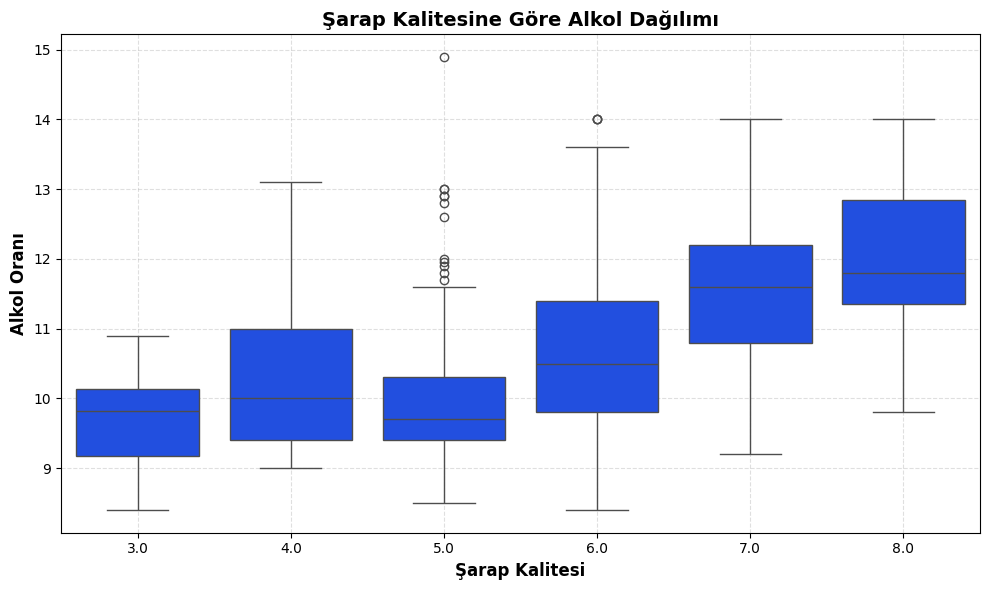

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_palette("bright")
sns.boxplot(x='kalite', y='alkol', data=p7wine)

plt.title("Åžarap Kalitesine GÃ¶re Alkol DaÄŸÄ±lÄ±mÄ±", fontsize=14, fontweight="bold")
plt.xlabel("Åžarap Kalitesi", fontweight="bold", fontsize=12)
plt.ylabel("Alkol OranÄ±", fontweight="bold", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Kalite 6 ve Ã¼zerindeki ÅŸaraplarda alkol oranÄ± net ÅŸekilde yÃ¼kseliyor Ã¶zellikle 7 ve 8 kalite gruplarÄ±nda bu artÄ±ÅŸ daha belirgin

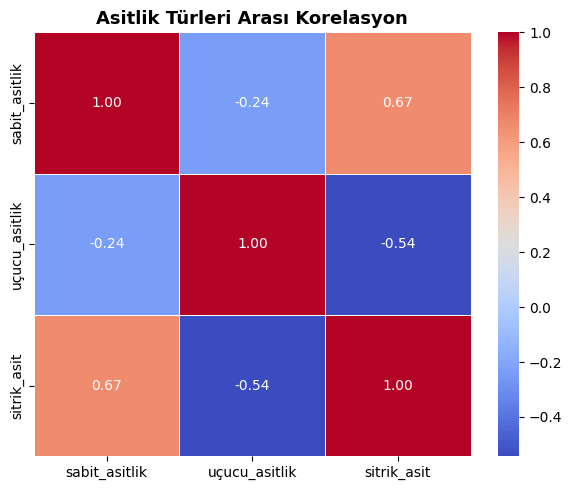

In [358]:
plt.figure(figsize=(6,5))
asitlik_sutunlari = ['sabit_asitlik', 'uÃ§ucu_asitlik', 'sitrik_asit']
kor = p7wine[asitlik_sutunlari].corr()

sns.heatmap(kor, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Asitlik TÃ¼rleri ArasÄ± Korelasyon", fontweight="bold", fontsize=13)
plt.tight_layout()
plt.show()

Sabit asitlik ile sitrik asit arasÄ±nda gÃ¼Ã§lÃ¼ ve pozitif bir iliÅŸki var yani biri arttÄ±kÃ§a diÄŸeri de artÄ±yor. Yani genel olarak uÃ§ucu asitlik diÄŸer asitliklerle ters gidiyor diyebiliriz.

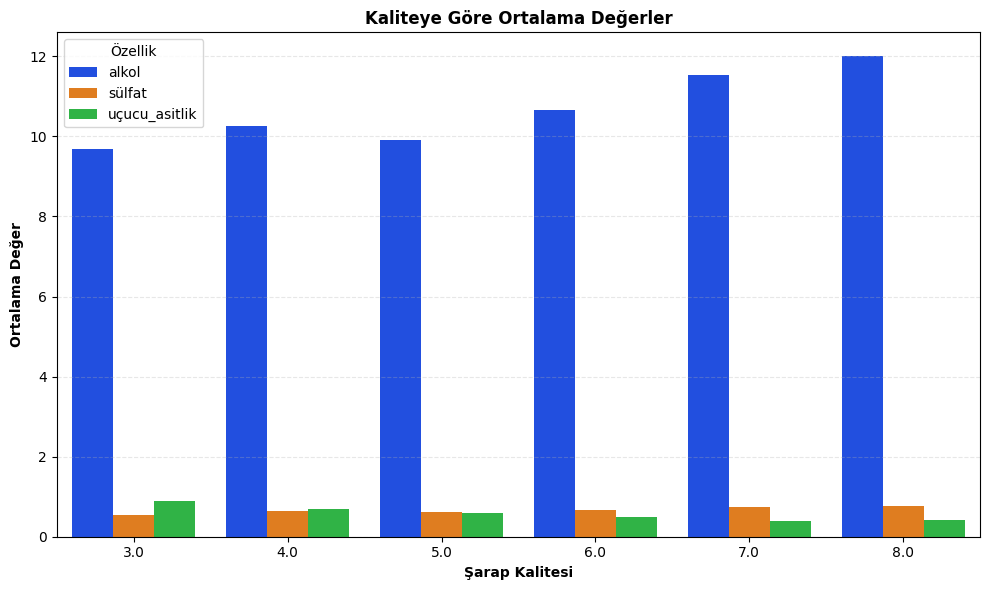

In [359]:
plt.figure(figsize=(10,6))
ortalama_df = (
    p7wine.groupby("kalite")[["alkol", "sÃ¼lfat", "uÃ§ucu_asitlik"]]
    .mean()
    .reset_index()
    .melt(id_vars="kalite", var_name="Ã¶zellik", value_name="ortalama_deÄŸer")
)

sns.barplot(data=ortalama_df, x="kalite", y="ortalama_deÄŸer", hue="Ã¶zellik")

plt.title("Kaliteye GÃ¶re Ortalama DeÄŸerler", fontweight="bold")
plt.xlabel("Åžarap Kalitesi", fontweight="bold")
plt.ylabel("Ortalama DeÄŸer", fontweight="bold")
plt.legend(title="Ã–zellik")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

BU grafik kaliteli ÅŸaraplarÄ±n daha Ã§ok alkol barÄ±ndÄ±rdÄ±ÄŸÄ±nÄ± gÃ¶steriyor. SÃ¼lfat ve uÃ§ucu asit ÅŸarap kalitesini Ã¶nemli derecede etkileyen metrikler deÄŸilmiÅŸ.

/var/folders/90/78252d3n5lsfth5ltb8c0dmw0000gn/T/ipykernel_16024/3967243205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=p7wine, x='kalite', y='ph', palette='Spectral')


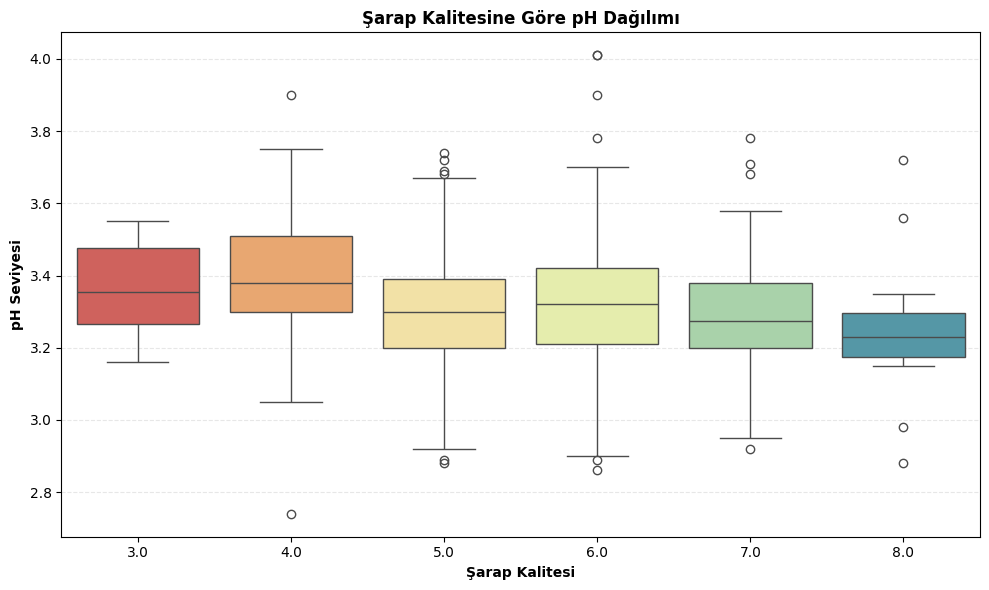

In [360]:
plt.figure(figsize=(10,6))
sns.boxplot(data=p7wine, x='kalite', y='ph', palette='Spectral')
plt.title("Åžarap Kalitesine GÃ¶re pH DaÄŸÄ±lÄ±mÄ±", fontweight="bold")
plt.xlabel("Åžarap Kalitesi", fontweight="bold")
plt.ylabel("pH Seviyesi", fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

Bu grafikte ph seviyesi kalite arttÄ±kÃ§a Ã§ok deÄŸiÅŸmiyor ama kalite 7 ve 8 olan ÅŸaraplarda daÄŸÄ±lÄ±m daha dar. Bu da yÃ¼ksek kaliteli ÅŸaraplarÄ±n ph seviyesi aÃ§Ä±sÄ±ndan daha dengeli olduÄŸunu gÃ¶steriyor. DÃ¼ÅŸÃ¼k kaliteli olanlarda ph daha kontrolsÃ¼z gibi.

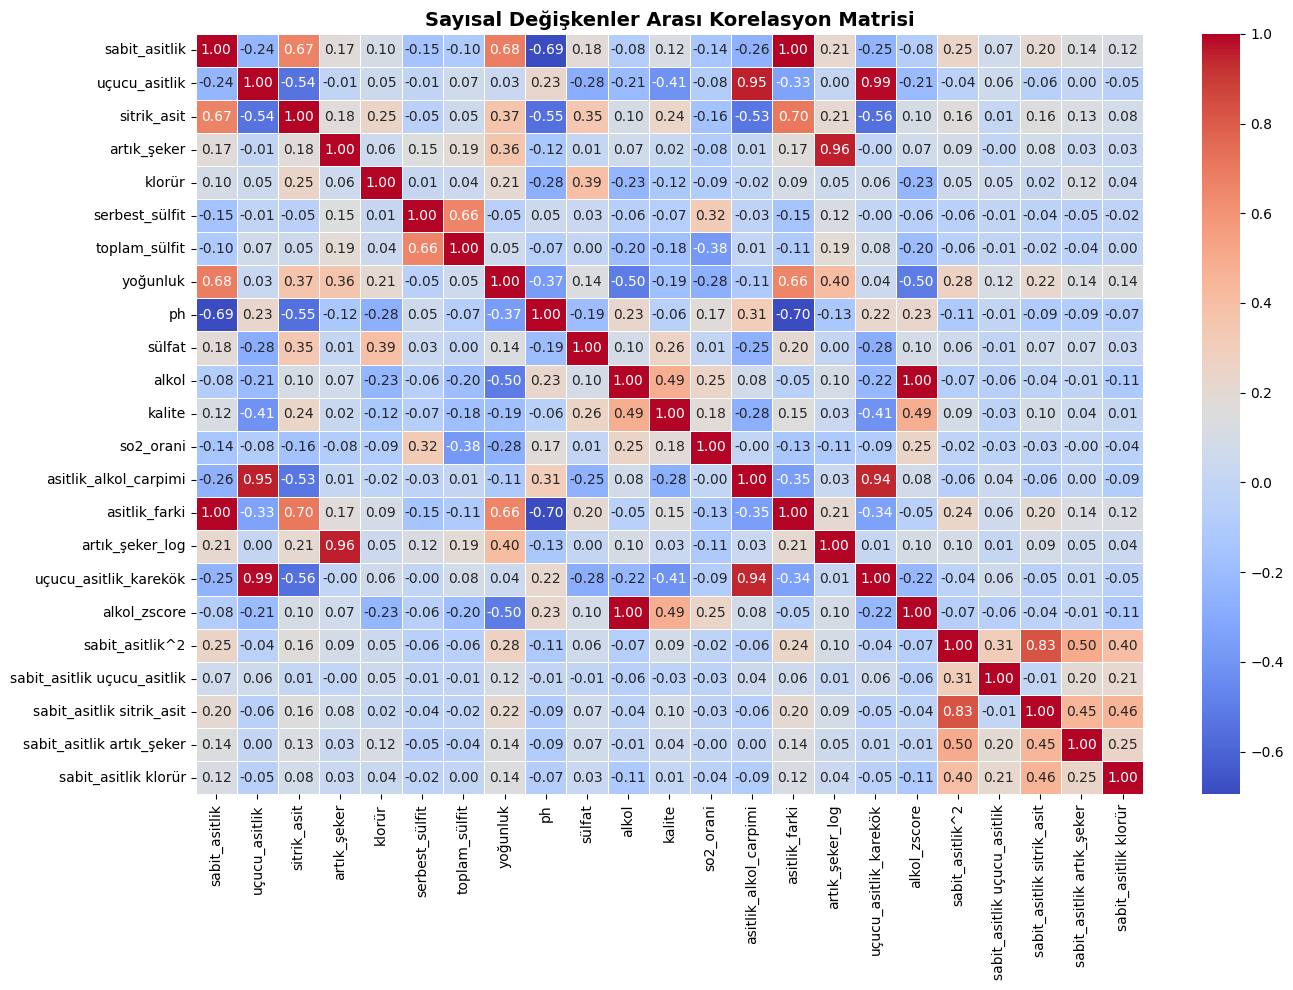

In [361]:
plt.figure(figsize=(14,10))
sayisal_sutunlar = p7wine.select_dtypes(include='number')
korelasyon = sayisal_sutunlar.corr()
sns.heatmap(korelasyon, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("SayÄ±sal DeÄŸiÅŸkenler ArasÄ± Korelasyon Matrisi", fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()

Alkol oranÄ± arttÄ±kÃ§a kalite de artÄ±yor iki sÃ¼tÃ¼n arasÄ±nda pozitif bir iliÅŸki var. UÃ§ucu asitlik ile kalite arasÄ±nda negatif bir iliÅŸki var yani uÃ§ucu asit arttÄ±kÃ§a kalite dÃ¼ÅŸÃ¼yor.

In [362]:
p7wine.isnull().sum()

sabit_asitlik                  116
uÃ§ucu_asitlik                  116
sitrik_asit                    116
artÄ±k_ÅŸeker                    116
klorÃ¼r                         116
serbest_sÃ¼lfit                 116
toplam_sÃ¼lfit                  116
yoÄŸunluk                       116
ph                             116
sÃ¼lfat                         116
alkol                          116
kalite                         116
so2_orani                      116
asitlik_alkol_carpimi          116
asitlik_farki                  116
artÄ±k_ÅŸeker_log                116
uÃ§ucu_asitlik_karekÃ¶k          116
alkol_zscore                   116
sabit_asitlik^2                116
sabit_asitlik uÃ§ucu_asitlik    116
sabit_asitlik sitrik_asit      116
sabit_asitlik artÄ±k_ÅŸeker      116
sabit_asitlik klorÃ¼r           116
dtype: int64

In [363]:
# NaN iÃ§eren satÄ±rlarÄ± temizle
p7wine = p7wine.dropna(subset=['kalite'])

MODELLEME

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = p7wine.drop(columns=['kalite'])
y = p7wine['kalite']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"RÂ²:   {r2:.4f}")

MAE:  0.5593
MSE:  0.5230
RMSE: 0.7232
RÂ²:   0.3918


Random forest modelimiz mÃ¼kemmel deÄŸil maalesef. Orta seviyede bir baÅŸarÄ±.